<h2>RNN</h2>

<h3>RNN Subscripts<h3>
<li> x=input </li>
<li> h = hidden </li>
<li> o=output </li>
<li> xh=input-to-hidden </li>
<li> hh=hidden-tohidden </li>

Difference between ANN & RNN


<table align="center" border="1">
<tr>
<th><h3 align="center">ANN</h3>
</th>
<th><h3 align="center">RNN</h3></th>

</tr>

<tr>
<td>

$$h=\sigma(W_{h}^{T}x+b_{h})$$
</td>
<td>

$$h_t = \sigma(W_{xh}^{T}x_t + W_{hh}^{T}h_{t-1}+b_{h})$$
</td>

</tr>
<tr>
<td>

$$\hat{y}=\sigma(W_{o}^{T}h+b_{o})$$
</td>
<td>

$$\hat{y}_{t} = \sigma(W_{o}^{T}h_{t}+b_{o})$$
</td>

</tr>
</table>


<h2>RNN Steps</h2>
<li>Step#1: load the data </br>
- input shape will be N x T x D (N is number of samples, T is the sequence length, and D is the number of features)</br>
- A single time-series input will be a 1-D array of length T</br>
- output will be N x K

</li>
<li>Step#2: build the model </li>
<li>Step#3: train the model </li>
<li>Step#4: evaluate  </li>
<li>Step#5: Predict </li>
model.predict(x.reshape(1, T, 1))[0,0]

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

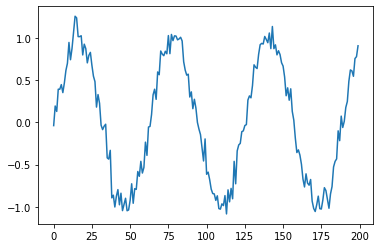

In [34]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200) * 0.1
plt.plot(series)

In [35]:
T = 10 # sequence length
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    y = series[t+T]
    X.append(x)
    Y.append(y)

# reshaping data 
X = np.array(X).reshape(-1,T,D)
Y = np.array(Y)
N = len(X)
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")
print(f"N: {N}")

Shape of X: (190, 10, 1)
Shape of Y: (190,)
N: 190


In [36]:
# building the model
i = Input(shape=(T,1))
x = SimpleRNN(5)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))


In [37]:
# splitting the data
X_train, X_valid = X[:-N//2], X[-N//2:]
Y_train, Y_valid = Y[:-N//2], Y[-N//2:]

# fitting the modl
history = model.fit(X_train, Y_train,
epochs=80,
validation_data=(X_valid, Y_valid))

Epoch 1/80
3/3 [==============================] - 0s 84ms/step - loss: 0.4269 - val_loss: 0.0657
Epoch 2/80
3/3 [==============================] - 0s 16ms/step - loss: 0.1406 - val_loss: 0.1838
Epoch 3/80
3/3 [==============================] - 0s 25ms/step - loss: 0.1456 - val_loss: 0.1148
Epoch 4/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0729 - val_loss: 0.0584
Epoch 5/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0371 - val_loss: 0.0373
Epoch 6/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0424 - val_loss: 0.0511
Epoch 7/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0421 - val_loss: 0.0322
Epoch 8/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0362 - val_loss: 0.0227
Epoch 9/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0341 - val_loss: 0.0279
Epoch 10/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0358 - val_loss: 0.0194
Epoch 11/80
3/3 [===================

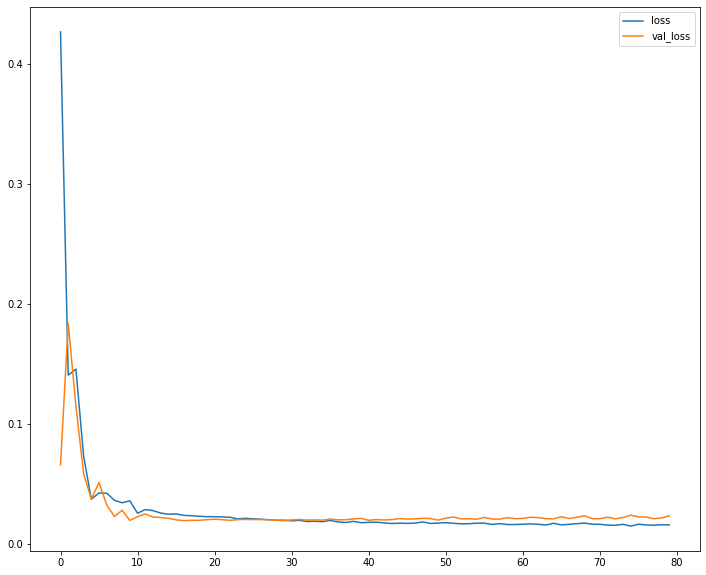

In [38]:
plt.figure(figsize=(12,10))
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [39]:
predictions = []

last_x = X[-N//2]
while len(predictions) < len(Y_valid):
    p = model.predict(last_x.reshape(1,-1,1))[0,0]
    predictions.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p


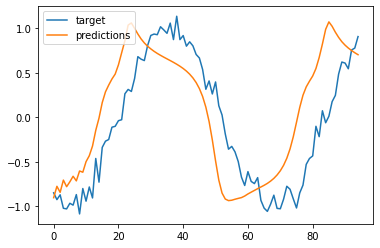

In [40]:
plt.plot(Y_valid, label="target")
plt.plot(predictions, label="predictions")
plt.legend()